### Autoencoder base cifar10

**Importações iniciais**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense

**Leitura da base de dados**

In [3]:
(previsores_treinamento, _), (previsores_teste, _) = cifar10.load_data()

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

170500096/170498071 [==============================] - 461s 3us/step


In [4]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

**Construção do Autoencoder**

In [5]:
autoencoder = Sequential()
autoencoder.add(Dense(units = 1536, activation = 'relu', input_dim = 3072))
autoencoder.add(Dense(units = 768, activation = 'relu'))

autoencoder.add(Dense(units = 1536, activation = 'relu'))
autoencoder.add(Dense(units = 3072, activation = 'sigmoid'))

In [6]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_2 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_3 (Dense)              (None, 1536)              1181184   
_________________________________________________________________
dense_4 (Dense)              (None, 3072)              4721664   
Total params: 11,803,392
Trainable params: 11,803,392
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
               epochs = 50, batch_size = 256,
               validation_data = (previsores_teste, previsores_teste))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.6263 - accuracy: 0.0115 - val_loss: 0.6063 - val_accuracy: 0.0119
Epoch 2/50
50000/50000 [==============================] - 47s 943us/step - loss: 0.5926 - accuracy: 0.0120 - val_loss: 0.5869 - val_accuracy: 0.0121
Epoch 3/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5832 - accuracy: 0.0120 - val_loss: 0.5825 - val_accuracy: 0.0121
Epoch 4/50
50000/50000 [==============================] - 48s 958us/step - loss: 0.5790 - accuracy: 0.0120 - val_loss: 0.5778 - val_accuracy: 0.0121
Epoch 5/50
50000/50000 [==============================] - 49s 979us/step - loss: 0.5770 - accuracy: 0.0121 - val_loss: 0.5755 - val_accuracy: 0.0121
Epoch 6/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5749 - accuracy: 0.0121 - val_loss: 0.5765 - val_accuracy: 0.0121
Epoch 7/50
50000/50000 [==============================] - 49s 

In [13]:
dimensao_original = Input(shape = (3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]

encoder = Model(dimensao_original, 
               camada_encoder2(camada_encoder1(dimensao_original)))

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_2 (Dense)              (None, 768)               1180416   
Total params: 5,900,544
Trainable params: 5,900,544
Non-trainable params: 0
_________________________________________________________________


In [14]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

**Visualização de imagens**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

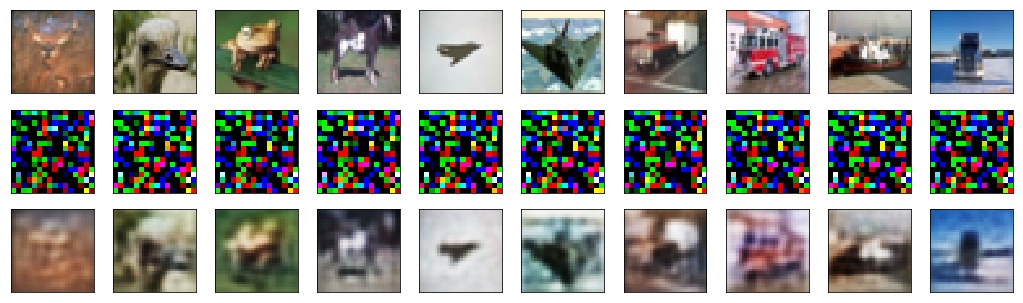

In [15]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 16, 3))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())
    